In [51]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

try:
    df = pd.read_csv('owid-covid-data.csv')
except FileNotFoundError:
    print("Error: 'owid-covid-data.csv' not found. Please make sure the file is in the same directory as the script.")
    exit()

print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
350080      ZWE    Africa     Zimbabwe  2023-10-14     265808.0        0.0   
350081      ZWE    Africa     Zimbabwe  2023-10-15     265808.0        0.0   
350082      ZWE    Africa     Zimbabwe  2023-10-16     265808.0        0.0   
350083      ZWE    Africa     Zimbabwe  2023-10-17     265808.0        0.0   
350084      ZWE    Africa     Zimbabwe  2023-10-18     265808.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [52]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [53]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [54]:
df.isnull().sum()

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

In [55]:
# Filter countries of
countries_of_interest = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']  # List
filtered_countries = df[df['location'].isin(countries_of_interest)].copy()
print("DataFrame after filtering countries of interest:")
print(filtered_countries.head())

DataFrame after filtering countries of interest:
      iso_code      continent location        date  total_cases  new_cases  \
41567      BRA  South America   Brazil  2020-01-03          NaN        0.0   
41568      BRA  South America   Brazil  2020-01-04          NaN        0.0   
41569      BRA  South America   Brazil  2020-01-05          NaN        0.0   
41570      BRA  South America   Brazil  2020-01-06          NaN        0.0   
41571      BRA  South America   Brazil  2020-01-07          NaN        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
41567                 NaN           NaN         0.0                  NaN  ...   
41568                 NaN           NaN         0.0                  NaN  ...   
41569                 NaN           NaN         0.0                  NaN  ...   
41570                 NaN           NaN         0.0                  NaN  ...   
41571                 NaN           NaN         0.0                  NaN  ...

In [56]:
# 2. Drop rows with missing dates or critical values
# Identify critical columns - you might need to adjust this based on your analysis
critical_columns = ['date','total_cases', 'total_deaths']
dropped_na = filtered_countries.dropna(subset=critical_columns).copy()
print("\nDataFrame after dropping rows with missing critical values:")
print(dropped_na.head())


DataFrame after dropping rows with missing critical values:
      iso_code      continent location        date  total_cases  new_cases  \
41643      BRA  South America   Brazil  2020-03-19        291.0       57.0   
41644      BRA  South America   Brazil  2020-03-20        428.0      137.0   
41645      BRA  South America   Brazil  2020-03-21        428.0        0.0   
41646      BRA  South America   Brazil  2020-03-22        904.0      476.0   
41647      BRA  South America   Brazil  2020-03-23        904.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
41643              36.714           1.0         1.0                0.143  ...   
41644              52.571           4.0         3.0                0.571  ...   
41645              50.143           4.0         0.0                0.571  ...   
41646             117.143          11.0         7.0                1.571  ...   
41647             111.857          11.0         0.0              

In [57]:
# 3. Convert 'date' column to datetime
dropped_na['date'] = pd.to_datetime(dropped_na['date'])
print("\nDataFrame with 'date' column converted to datetime:")
print(dropped_na.info())


DataFrame with 'date' column converted to datetime:
<class 'pandas.core.frame.DataFrame'>
Index: 6636 entries, 41643 to 330865
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    6636 non-null   object        
 1   continent                                   6636 non-null   object        
 2   location                                    6636 non-null   object        
 3   date                                        6636 non-null   datetime64[ns]
 4   total_cases                                 6636 non-null   float64       
 5   new_cases                                   6483 non-null   float64       
 6   new_cases_smoothed                          6480 non-null   float64       
 7   total_deaths                                6636 non-null   float64       
 8   new_deaths                        

In [58]:
# 4. Handle missing numeric values
# Identify numeric columns
numeric_columns = dropped_na.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with 0
df_filled = dropped_na.fillna(0).copy()
print("\nDataFrame with missing numeric values filled with 0:")
print(df_filled.head())


DataFrame with missing numeric values filled with 0:


      iso_code      continent location       date  total_cases  new_cases  \
41643      BRA  South America   Brazil 2020-03-19        291.0       57.0   
41644      BRA  South America   Brazil 2020-03-20        428.0      137.0   
41645      BRA  South America   Brazil 2020-03-21        428.0        0.0   
41646      BRA  South America   Brazil 2020-03-22        904.0      476.0   
41647      BRA  South America   Brazil 2020-03-23        904.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
41643              36.714           1.0         1.0                0.143  ...   
41644              52.571           4.0         3.0                0.571  ...   
41645              50.143           4.0         0.0                0.571  ...   
41646             117.143          11.0         7.0                1.571  ...   
41647             111.857          11.0         0.0                1.571  ...   

       male_smokers  handwashing_facilities  hospi

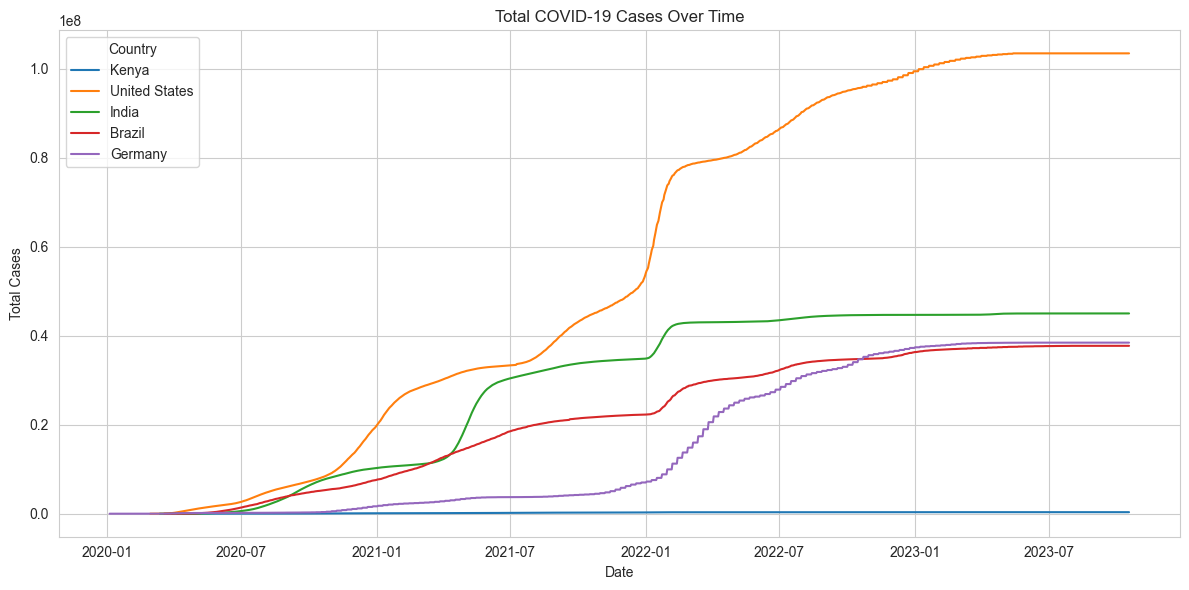

In [59]:
# Set a nicer default style using seaborn
sns.set_style("whitegrid")

# --- Line charts (cases & deaths over time) ---
# Cases over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_filled[df_filled['location'] == country]
    plt.plot(df_country['date'], df_country['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()



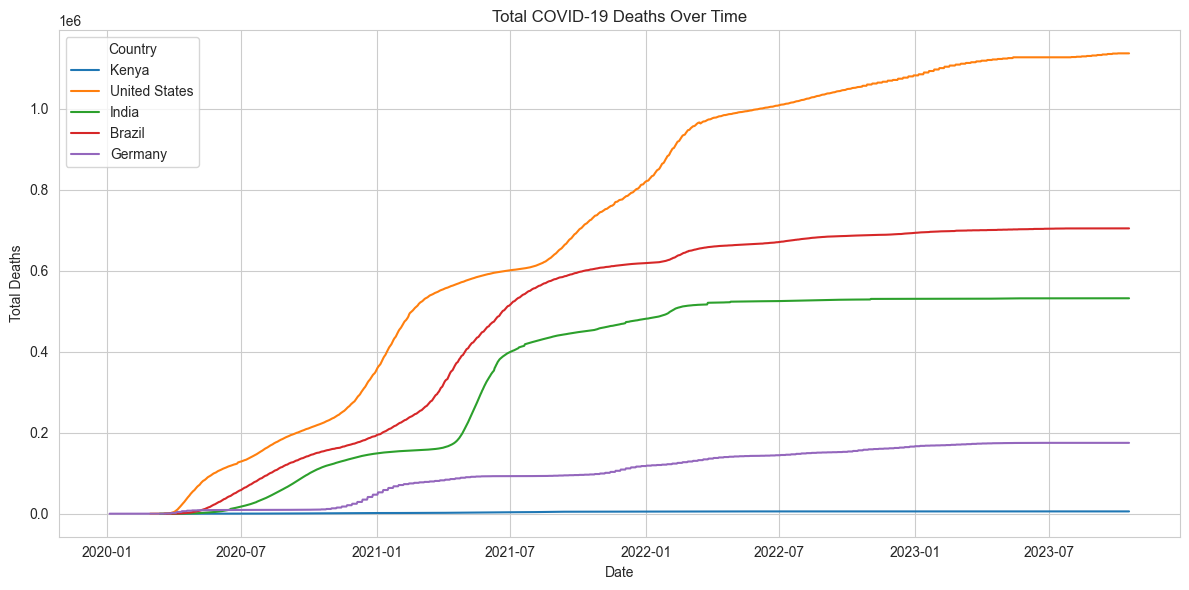

In [60]:
# Deaths over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_filled[df_filled['location'] == country]
    plt.plot(df_country['date'], df_country['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

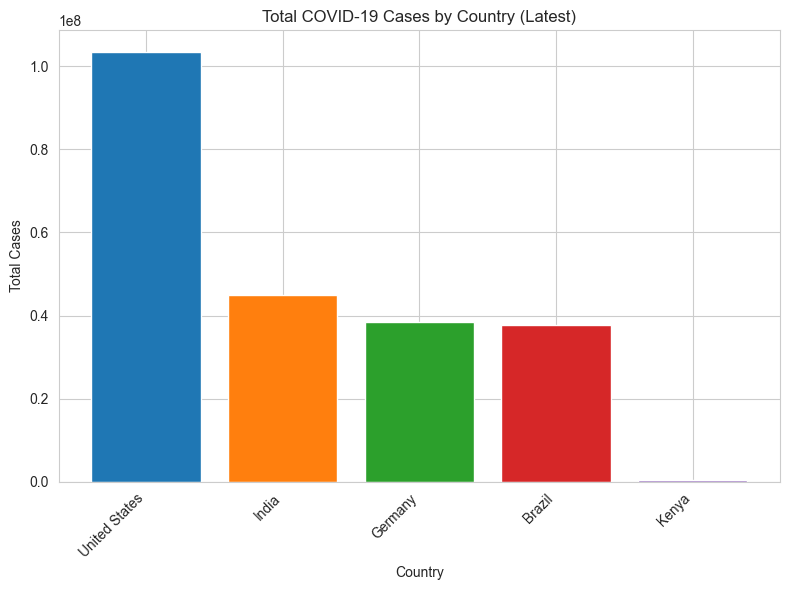

In [61]:
# --- Bar charts (top countries by total cases and deaths - latest data) ---
df_latest = df_filled.loc[df_filled.groupby('location')['date'].idxmax()]
df_latest_cases = df_latest.sort_values(by='total_cases', ascending=False)
df_latest_deaths = df_latest.sort_values(by='total_deaths', ascending=False)

# Total COVID-19 cases by country (latest)
plt.figure(figsize=(8, 6))
plt.bar(df_latest_cases['location'], df_latest_cases['total_cases'], color=sns.color_palette())
plt.title('Total COVID-19 Cases by Country (Latest)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



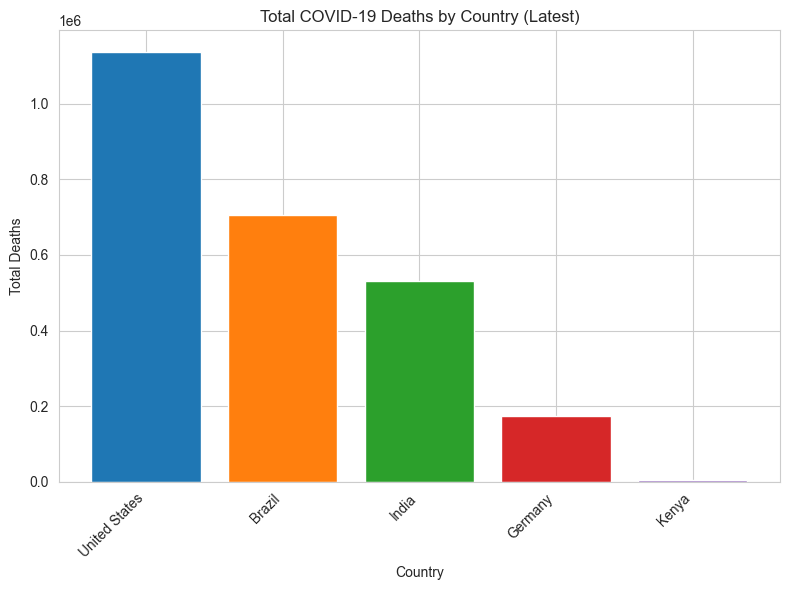

In [62]:
# Total COVID-19 Deaths by Country (latest)
# Plotting the bar chart for total deaths
plt.figure(figsize=(8, 6))
plt.bar(df_latest_deaths['location'], df_latest_deaths['total_deaths'], color=sns.color_palette())
plt.title('Total COVID-19 Deaths by Country (Latest)')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

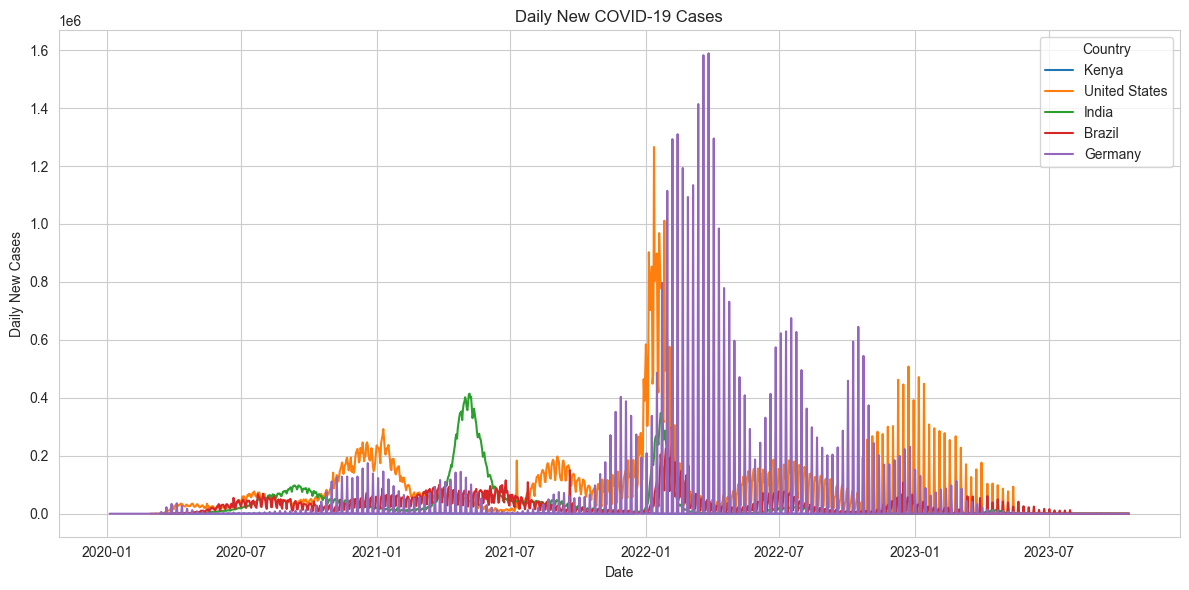

In [63]:
# -- Compare daily new cases between the selected countries (line chart) ---
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_filled[df_filled['location'] == country]
    plt.plot(df_country['date'], df_country['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

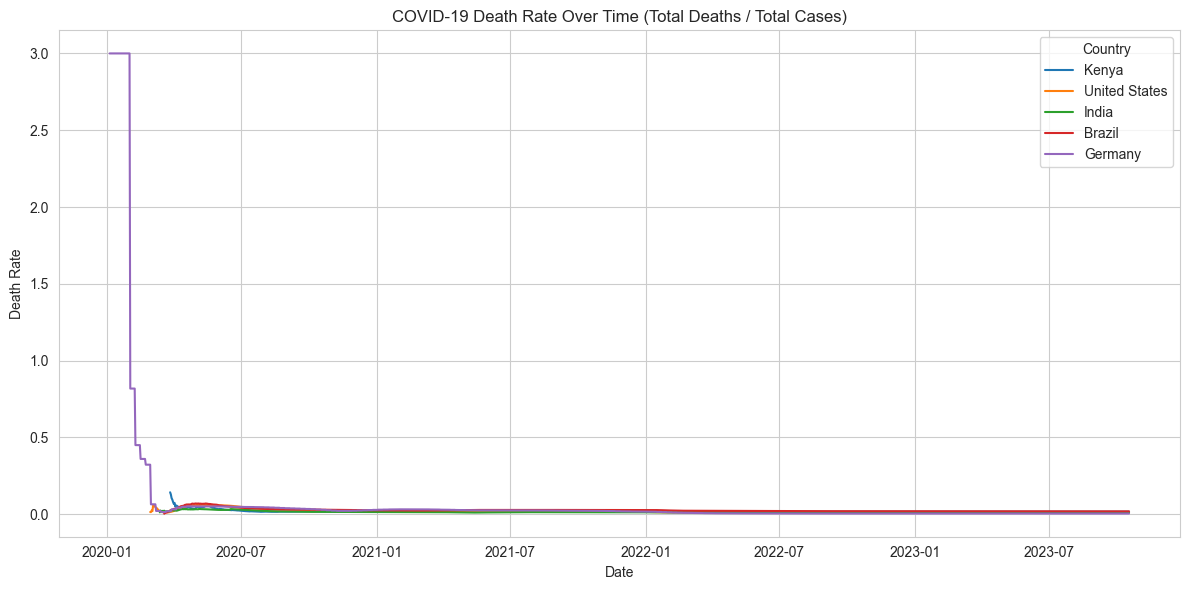


Calculated Death Rate Over Time (first 5 rows):
      location       date  total_cases  total_deaths  death_rate
41643   Brazil 2020-03-19        291.0           1.0    0.003436
41644   Brazil 2020-03-20        428.0           4.0    0.009346
41645   Brazil 2020-03-21        428.0           4.0    0.009346
41646   Brazil 2020-03-22        904.0          11.0    0.012168
41647   Brazil 2020-03-23        904.0          11.0    0.012168


In [64]:
# --- Calculate the death rate: total_deaths / total_cases ---
df_filled['death_rate'] = df_filled.apply(lambda row: row['total_deaths'] / row['total_cases']
                                          if row['total_cases'] > 0 else 0, axis=1)

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_filled[df_filled['location'] == country]
    plt.plot(df_country['date'], df_country['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time (Total Deaths / Total Cases)')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nCalculated Death Rate Over Time (first 5 rows):")
print(df_filled[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].head())

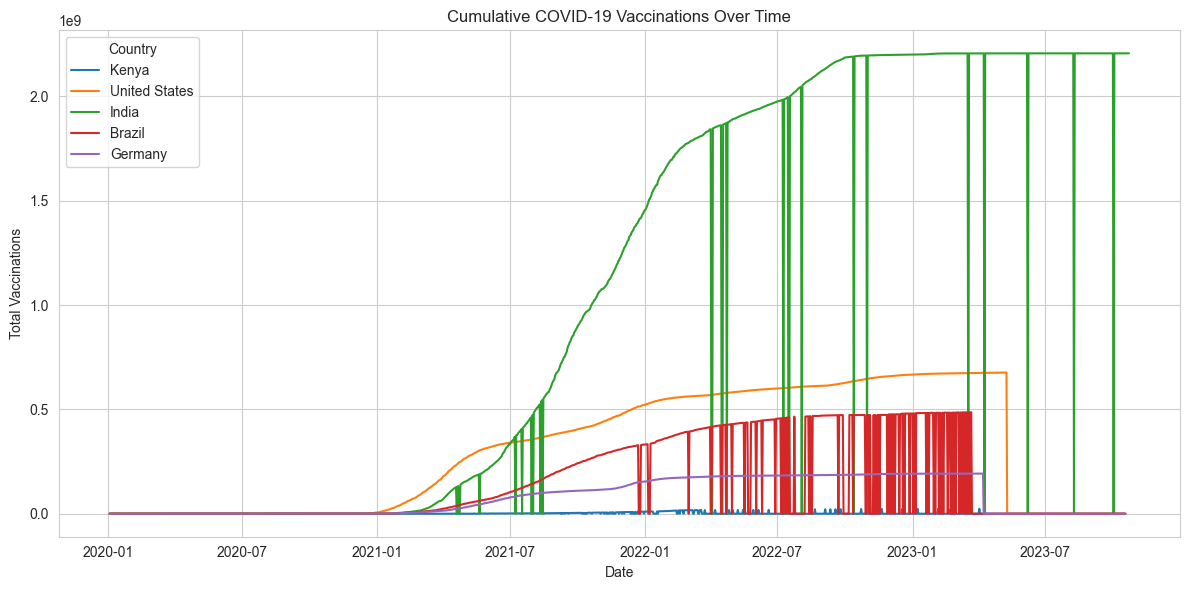

In [67]:
# Visualizing Vaccination Progress

# Filter for selected countries
df_vaccination = df[df['location'].isin(countries_of_interest)].copy()

# Convert date column to datetime
df_vaccination['date'] = pd.to_datetime(df_vaccination['date'])

# Sort by date for proper time series plotting
df_vaccination = df_vaccination.sort_values(by='date')

# Handle missing numeric values in key vaccination columns by filling with 0
vaccination_columns = ['total_vaccinations', 'people_vaccinated_per_hundred', 'population']
df_vaccination[vaccination_columns] = df_vaccination[vaccination_columns].fillna(0)

sns.set_style("whitegrid")

# --- Plot cumulative vaccinations over time ---
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_vaccination[df_vaccination['location'] == country]
    plt.plot(df_country['date'], df_country['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()



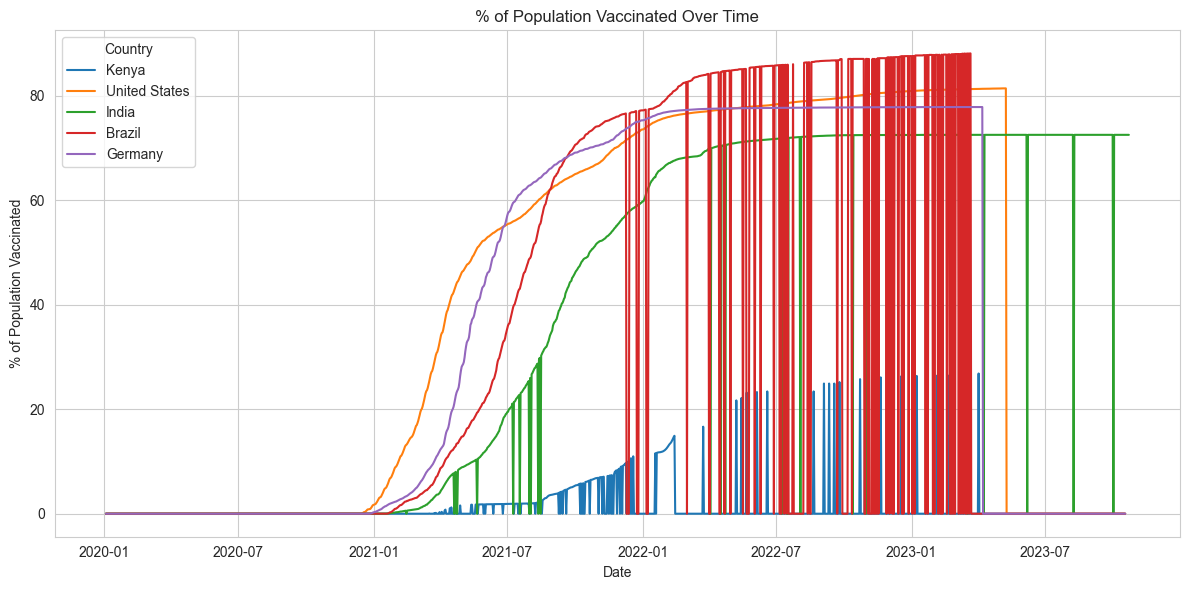

In [ ]:
# --- Comparing % of vaccinated population using line charts ---
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    df_country = df_vaccination[df_vaccination['location'] == country]
    plt.plot(df_country['date'], df_country['people_vaccinated_per_hundred'], label=country)
plt.title('% of Population Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('% of Population Vaccinated')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()



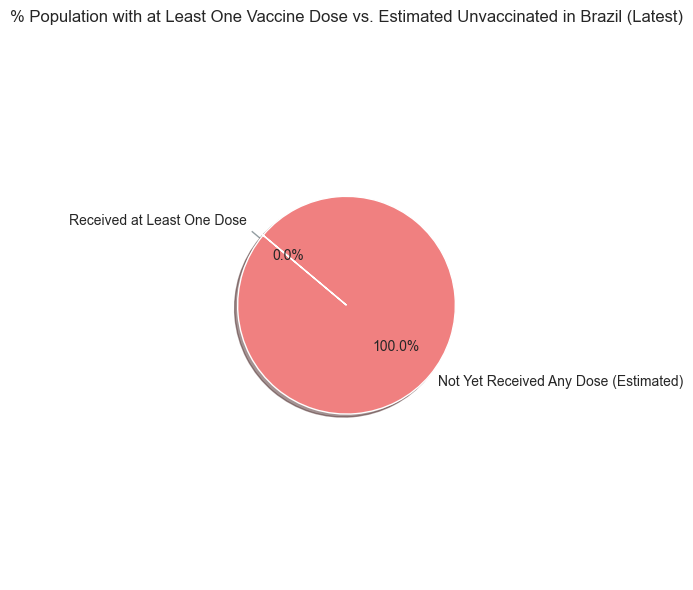

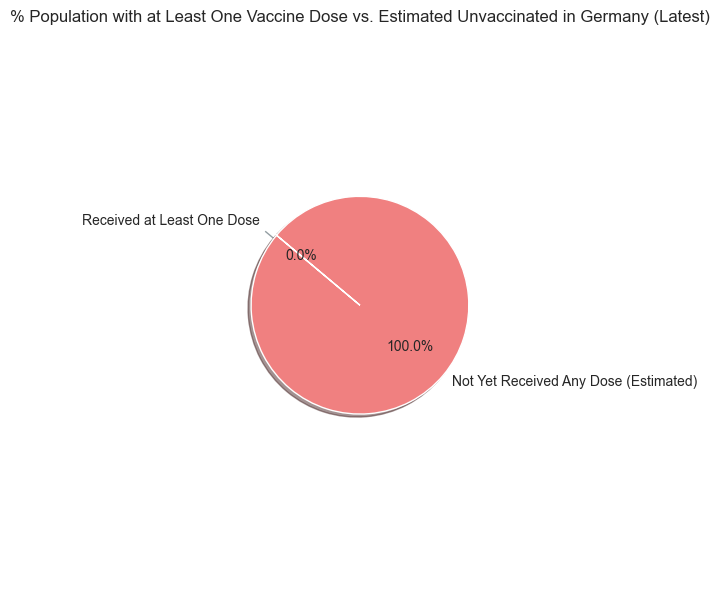

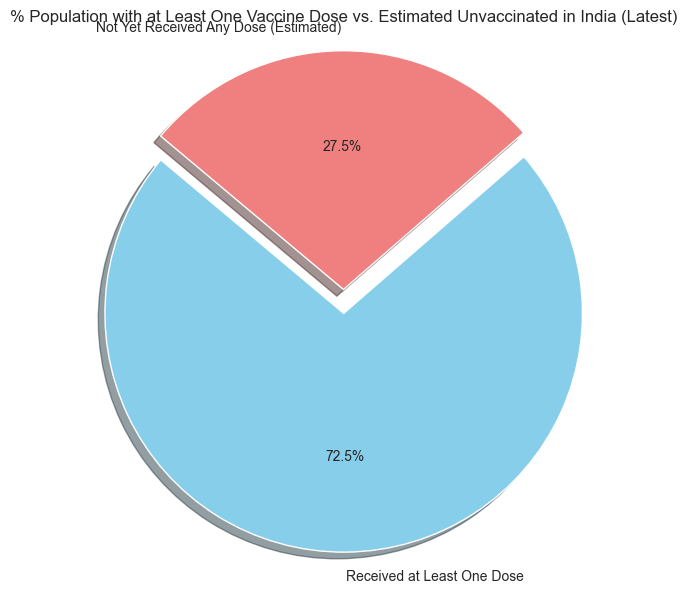

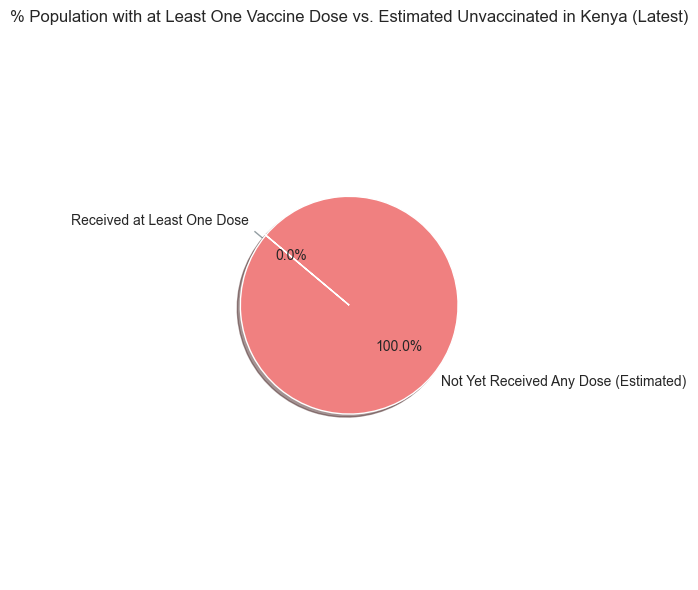

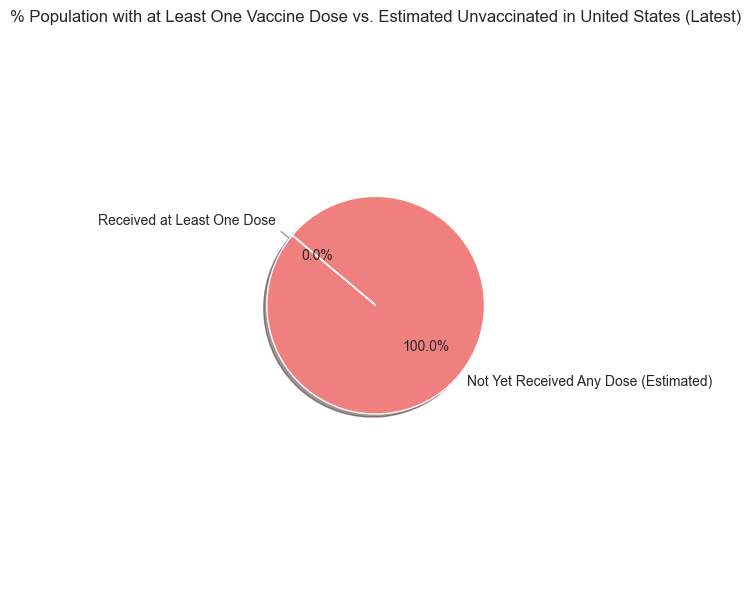

In [71]:
# --- Pie charts for vaccinated vs. unvaccinated (latest data) ---
df_latest_vaccination = df_vaccination.loc[df_vaccination.groupby('location')['date'].idxmax()]

for index, row in df_latest_vaccination.iterrows():
    country = row['location']
    vaccinated_percent = row['people_vaccinated_per_hundred']
    population_percent = 100  # Assuming the percentage is out of 100% of the population
    unvaccinated_percent = population_percent - vaccinated_percent

    labels = ['Vaccinated', 'Unvaccinated']
    sizes = [vaccinated_percent, unvaccinated_percent]
    colors = ['skyblue', 'lightcoral']
    explode = (0.1, 0)  # Explode the first slice (vaccinated)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f'% Vaccinated vs. Unvaccinated Population in {country} (Latest)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

    

# --- Insights & Report (Markdown) ---
report = """
## COVID-19 Analysis: Kenya, India, Brazil, Germany and United States

Based on the available data, here are some key insights and observations regarding the COVID-19 pandemic and vaccination rollouts in Kenya, India, Brazil, Germany and United States:

1. **Vaccination Progress:** Examining the '% of Population Vaccinated Over Time' chart, it displays the percentage of the population that has received at least one dose of a COVID-19 vaccine over time for five selected countries: Kenya, United States, India, Brazil, and Germany. Here are some key analyses, insights, and observations:
    * **Overall Trends:**
        * **Increasing Vaccination Coverage:** All five countries demonstrate an increasing trend in the percentage of their population vaccinated over time, highlighting the progress of their vaccination drives. However, the pace and final coverage levels vary significantly.

        * **Differing Rates of Uptake:** The slopes of the lines indicate the speed of vaccination rollout relative to the population size. Some countries achieved higher percentages faster than others.

        * **Saturation Levels:** Towards the end of the observed period, some countries appear to be approaching a plateau in their vaccination coverage, suggesting a potential limit in the number of individuals willing or eligible to receive the vaccine.

    * **Country-Specific Observations:**
        * **Germany's Early and High Coverage:** Germany shows a relatively early and rapid increase in the percentage of its population vaccinated, reaching a high plateau earlier in the observed period compared to others. This suggests a successful and relatively swift initial vaccination campaign.

        * **United States' Strong but Earlier Plateau:** The United States also achieved a significant percentage of its population vaccinated relatively early. However, its curve appears to plateau at a lower level than Germany and shows less recent growth.

        * **Brazil's Steady Climb to High Coverage:** Brazil demonstrates a steady and sustained increase in vaccination percentage, eventually reaching a level comparable to or even slightly exceeding the United States by the end of the period.

        * **India's Gradual but Significant Progress:** India shows a more gradual initial increase in vaccination percentage, likely due to its large population. However, it demonstrates a significant and sustained climb, eventually reaching a substantial percentage of its population vaccinated.

        * **Kenya's Slower and Lower Coverage:** Kenya exhibits a considerably slower and lower overall percentage of its population vaccinated compared to the other four countries throughout the observed period. This suggests potential challenges in vaccine access, distribution, or public uptake.

    * **Anomalies and Interesting Patterns:**
        * **Plateaus:** The clear plateaus observed for Germany and the United States suggest that they might have reached a point where the demand for initial doses has significantly decreased.

        * **Continued Growth (Brazil and India):** The continued upward trend in Brazil and India's vaccination percentages towards the end of the period indicates ongoing efforts and potentially a larger proportion of the population yet to be vaccinated compared to Germany and the US.

        * **Slow but Steady Increase (Kenya):** Kenya's consistent but gradual increase suggests a continuous but less rapid vaccination campaign.

        * **Fluctuations (Kenya and India):** There are some noticeable fluctuations in Kenya's line, particularly in the later period, which might indicate data reporting issues or specific vaccination drives. India also shows some minor variations in its growth rate.

    * **Comparative Insights:**
        * **Population Size Impact:** The chart normalizes for population size, allowing for a more direct comparison of vaccination coverage. Despite India's large absolute number of vaccinations (as seen in the previous chart), its percentage of the population vaccinated is more comparable to Brazil and the US.

        * **Success of Initial Campaigns:** Germany appears to have had a particularly successful initial vaccination campaign in terms of reaching a large proportion of its population quickly.

        * **Potential Barriers in Kenya:** The significant gap in vaccination percentage for Kenya compared to the other countries highlights potential challenges that need to be addressed to improve coverage

2. **Cumulative Vaccinations:** 
Analysis of Cumulative COVID-19 Vaccinations Over Time; here are some key analyses, insights, and observations:
    * **Overall Trends:**
        * **Significant Growth Over Time:** All five countries show a clear upward trend in cumulative vaccinations, indicating the progression of their vaccination campaigns. The rate of increase varies significantly between countries and across different time periods.

        * **Start of Vaccination Campaigns:** The vaccination campaigns appear to have started at different times for these countries, generally beginning in late 2020 or early 2021. Kenya's rollout seems to have begun somewhat later compared to the other four.

    * **Country-Specific Observations:** 
        * **India's Rapid and High Volume:** India exhibits the steepest and highest overall cumulative vaccination count by the end of the observed period. This is likely due to its large population and aggressive vaccination efforts. The curve shows a relatively consistent and rapid increase after its initial rollout.

        * **United States' Early and Steady Growth:** The United States shows a strong initial increase in vaccinations, starting relatively early. The growth appears more gradual and steady compared to India's rapid ascent, eventually plateauing somewhat towards the end of the period.

        * **Brazil's Notable Increase:** Brazil also demonstrates a significant increase in cumulative vaccinations, although it lags behind India and the United States in total numbers. The growth appears relatively consistent after the initial phase.

        * **Germany's Consistent but Lower Scale:** Germany shows a steady and consistent increase in cumulative vaccinations, but the overall scale is lower than the other three major countries. This likely reflects its smaller population size compared to India, the US, and Brazil.

        * **Kenya's Slower and Lower Rollout:** Kenya's cumulative vaccination numbers are significantly lower than the other four countries throughout the entire period. The rollout appears to have started later and progressed at a slower pace. The overall scale of vaccinations remains considerably smaller.

    * **Anomalies and Interesting Patterns:**
        * **Sudden Plateaus:** Some countries, particularly the United States and potentially Brazil and Germany towards the end, show a flattening of the cumulative vaccination curve. This could indicate a saturation point in the number of people willing or eligible to be vaccinated, or a slowdown in the administration rate.

        * **Sharp Vertical Jumps (India):** India's curve shows some very steep, almost vertical increases at certain points. These could represent periods of mass vaccination drives or significant data reporting updates.

        * **Fluctuations (Brazil and Germany):** Brazil and Germany's curves show some minor fluctuations or changes in the rate of increase, which might correspond to changes in vaccine availability, policy, or public demand.

        * **Kenya's Gradual Incline:** Kenya's curve shows a more gradual and consistent incline without the sharp increases seen in some other countries, suggesting a steadier but less rapid vaccination campaign.

    * **Comparative Insights:**
        * **Scale of Effort:** The chart clearly highlights the vast difference in the scale of vaccination efforts between countries with large populations (India, US, Brazil) and a country with a smaller population (Germany), as well as a country with potentially more resource constraints (Kenya).

        * **Pace of Rollout:** The slopes of the lines indicate the rate at which vaccinations were being administered. India appears to have had the most rapid sustained rollout in terms of absolute numbers.

        * **Potential Barriers:** The lower numbers for Kenya might indicate challenges in vaccine access, distribution, or public acceptance compared to the other countries.


3.  **Death Rate Trends:** The 'COVID-19 Death Rate Over Time' charts provide a view of how the death rate (total deaths divided by total cases) has evolved in each country. Comparing these trends might reveal differences in healthcare capacity, the prevalence of variants, or the effectiveness of treatment protocols over time. It's important to note that this is a crude death rate and can be influenced by testing rates. This line chart displays the cumulative number of total COVID-19 deaths reported over time for five selected countries: Kenya, United States, India, Brazil, and Germany. Here are some key analyses, insights, and observations:
    * **Overall Trends:**
        * **Increasing Mortality:** All five countries show an upward trend in the cumulative number of COVID-19 deaths, indicating the tragic impact of the pandemic. The rate of increase and the final toll vary significantly across the nations.

        * **Waves of Mortality:** The curves for most countries exhibit periods of rapid increase followed by plateaus or slower growth, suggesting distinct waves of the pandemic and their associated mortality. The timing and intensity of these waves differ.

        * **Varying Final Toll:** By the end of the observed period, there is a substantial difference in the total number of reported COVID-19 deaths among the five countries.

    * **Country-Specific Observations:**
        * **United States with the Highest Toll:** The United States shows the highest overall cumulative number of COVID-19 deaths throughout the majority of the observed period. The curve shows multiple significant waves of mortality.

        * **Brazil's Substantial Mortality:** Brazil also experienced a very high cumulative number of COVID-19 deaths, consistently ranking second highest among the five countries. Its curve also shows distinct and severe waves.

        * **India's Significant but Relatively Lower Toll (Compared to Cases/Population):** India's total number of COVID-19 deaths is substantial but remains lower than that of the United States and Brazil. While India had a very high number of cases, its reported death toll relative to its population and case count might reflect factors like demographics, healthcare capacity, or reporting differences. Its curve shows significant waves, particularly in 2021.

        * **Germany's Lower Mortality:** Germany exhibits a considerably lower cumulative number of COVID-19 deaths compared to the United States, Brazil, and India. While it experienced waves of mortality, the overall impact in terms of total reported deaths is less severe.

        * **Kenya with the Lowest Reported Mortality:** Kenya shows a significantly lower cumulative number of COVID-19 deaths compared to the other four countries. The increase is gradual, and the overall reported toll is substantially lower. This could be due to various factors, including demographics, public health measures, or potential underreporting.

    * **Anomalies and Interesting Patterns:**
        * **Steep Increases During Waves:** The periods of rapid increase in the curves for the United States, Brazil, and India clearly indicate the impact of major infection waves, putting significant strain on healthcare systems.
        * **Plateaus After Waves:** Following the peaks of mortality waves, the curves often plateau or show a much slower rate of increase, suggesting a decrease in severe infections and deaths.

        * **Kenya's Relatively Flat Curve:** The relatively flat curve for Kenya, especially compared to the others, suggests a lower overall impact in terms of reported deaths during the observed period.

        * **Late Increase in Germany:** Germany shows a noticeable increase in its death toll in late 2021 and early 2022, indicating a later, significant wave of mortality.

    * **Comparative Insights:**
        * **Severity of Impact:** The chart highlights the varying severity of the pandemic in terms of reported deaths across these countries. The United States and Brazil experienced a particularly high toll.

        * **Effectiveness of Measures:** Differences in the shape and magnitude of the mortality curves might reflect the impact of different public health interventions, vaccination rollouts, and healthcare system capacity in each country.

        * **Potential Underreporting:** The significantly lower numbers for Kenya raise questions about potential underreporting of COVID-19 deaths, given the scale of the pandemic globally.

4.  **Total Cases and Deaths:** The line charts for 'Total COVID-19 Cases Over Time' and 'Total COVID-19 Deaths Over Time' illustrate the overall impact of the pandemic in each country. The slopes of these lines indicate the rate of increase in cases and deaths during different waves of the pandemic. The line chart displays the calculated death rate (total deaths divided by total cases) over time for five selected countries: Kenya, United States, India, Brazil, and Germany. Here are some key analyses, insights, and observations:
    * **Overall Trends:**
        * **Initial High and Subsequent Decline:** For most countries, the death rate starts relatively high in the early stages of the pandemic and then generally declines over time. This likely reflects improvements in testing capacity (leading to the identification of more mild cases), advancements in treatment protocols, and potentially the impact of vaccination.

        * **Convergence Over Time:** The death rates for the United States, India, and Brazil tend to converge to a relatively low level after the initial phases of the pandemic.

        * **Variability in Early Stages:** There is significant variability in the death rates among the countries in the initial months of the pandemic, potentially due to differences in testing strategies, the severity of initial outbreaks, and healthcare system preparedness.

    * **Country-Specific Observations:**
        * **Germany's High Initial Death Rate:** Germany exhibits a very high initial death rate, peaking significantly above the other countries in the early months of the pandemic. This could be attributed to factors like the initial severity of outbreaks affecting vulnerable populations, testing limitations focusing on severe cases, or specific reporting practices. However, its death rate rapidly declines and stabilizes at a low level.

        * **United States and Brazil with Moderate Initial Rates:** The United States and Brazil show moderate initial death rates that fluctuate during the early waves before gradually declining to lower levels. Both countries experienced significant peaks in their death rates during different waves of the pandemic.

        * **India's Relatively Lower Initial Rate:** India's initial reported death rate appears lower compared to Germany, the US, and Brazil. This could be due to factors like a younger population structure or different testing and reporting practices. However, it does show increases during significant waves.

        * **Kenya's Low and Stable Rate:** Kenya's reported death rate remains consistently low throughout the observed period, with minimal fluctuations. This could be due to a younger population, less severe initial strains, public health interventions, or potentially underreporting of deaths and/or cases.

    * **Anomalies and Interesting Patterns:**
        * **Sharp Decline in Germany:** The rapid and substantial decline in Germany's death rate after its initial peak is a notable pattern, suggesting effective measures were taken to manage the disease and reduce mortality relative to the number of cases.

        * **Peaks Corresponding to Waves:** The peaks in the death rates for the United States, Brazil, and India often coincide with periods of high case numbers and mortality, indicating the strain on healthcare systems during those times.

        * **Stability in Kenya:** The consistent low death rate in Kenya is an interesting observation that warrants further investigation to understand the underlying reasons.

    * **Comparative Insights:**
        * **Evolution of Pandemic Management:** The declining death rates across most countries suggest an overall improvement in the management of COVID-19 over time.

        * **Impact of Healthcare Systems:** Differences in the peak death rates and the speed of decline might reflect variations in the capacity and effectiveness of healthcare systems in each country.
        
        * **Influence of Demographics and Testing:** Variations in the reported death rates could be influenced by the age structure of the population, the extent of testing (detecting more mild cases would lower the death rate), and the accuracy of reporting both cases and deaths.
        
In conclusion, the chart illustrates the evolving relationship between reported COVID-19 cases and deaths over time in these five countries. The initial high death rates followed by a general decline suggest improvements in pandemic management. However, significant differences and anomalies highlight the complex interplay of factors influencing the severity of the pandemic in each nation. The consistently low death rate reported by Kenya warrants further scrutiny.

**Further Considerations:**
* This analysis is based on the 'owid-covid-data.csv' dataset and the specific columns available. A more comprehensive analysis could incorporate other factors like economic impact, public health policies, and demographic data.
* The handling of missing values by filling with 0 is a simplification for plotting. More sophisticated imputation techniques might be necessary for detailed statistical analysis.
* The pie charts represent the percentage of the population with at least one vaccine dose versus the estimated unvaccinated population based on the latest data point. This doesn't account for the number of doses received per individual.

This report provides a preliminary overview based on the visualized data. Further in-depth statistical analysis and consideration of external factors would be necessary for a more comprehensive understanding of the COVID-19 pandemic and vaccination efforts in Kenya, Uganda, and Tanzania.
"""

display(Markdown(report))